In [43]:
import numpy as np
import sklearn as sk
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from preprocess import preprocessing_data

In [44]:
df_consumption = preprocessing_data() # read data

col_list = [col for col in df_consumption.columns] #read col names in a list
del col_list[0:2]
print(col_list)

['week_1', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_2', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_3', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_4', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49', 'week_5', 'week_50', 'week_51', 'week_52', 'week_53', 'week_6', 'week_7', 'week_8', 'week_9']


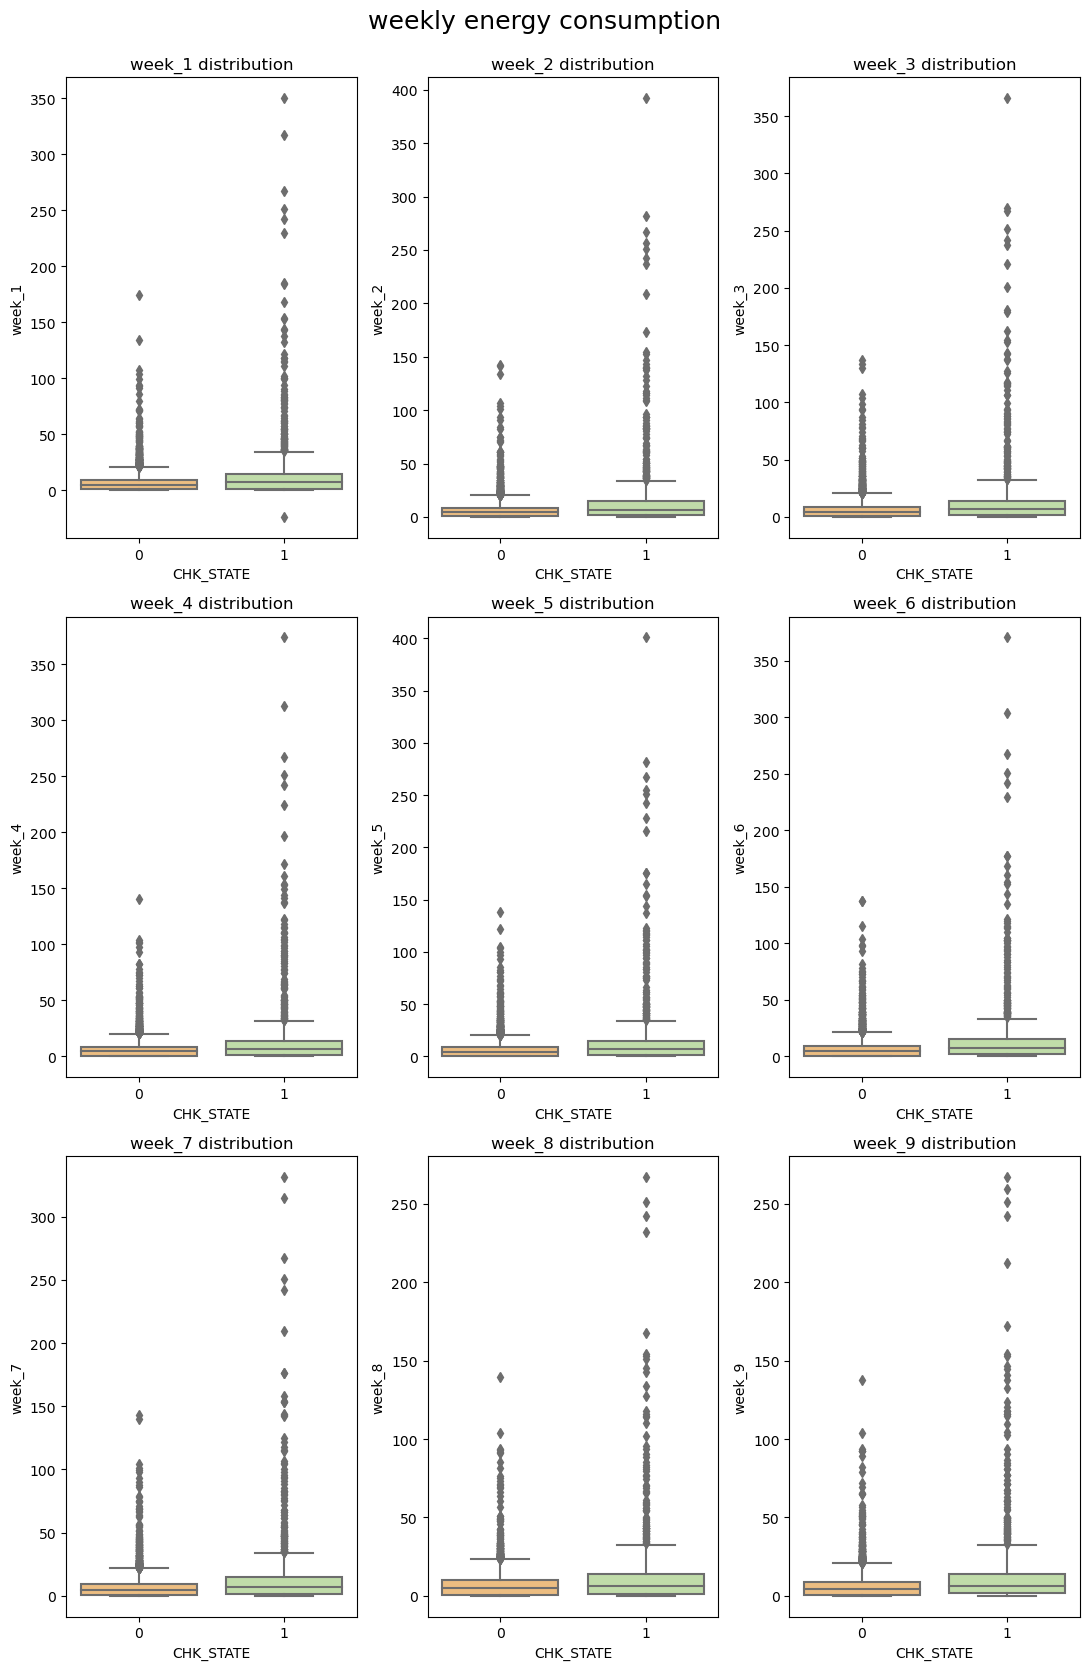

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11, 17))
fig.suptitle('weekly energy consumption\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df_consumption, x='CHK_STATE', y='week_1', palette='Spectral')
axes[0,0].set_title("week_1 distribution");

sns.boxplot(ax=axes[0, 1], data=df_consumption, x='CHK_STATE', y='week_2', palette='Spectral')
axes[0,1].set_title("week_2 distribution");

sns.boxplot(ax=axes[0, 2], data=df_consumption, x='CHK_STATE', y='week_3', palette='Spectral')
axes[0,2].set_title("week_3 distribution");

sns.boxplot(ax=axes[1, 0], data=df_consumption, x='CHK_STATE', y='week_4', palette='Spectral')
axes[1,0].set_title("week_4 distribution");

sns.boxplot(ax=axes[1, 1], data=df_consumption, x='CHK_STATE', y='week_5', palette='Spectral')
axes[1,1].set_title("week_5 distribution");

sns.boxplot(ax=axes[1, 2], data=df_consumption, x='CHK_STATE', y='week_6', palette='Spectral')
axes[1,2].set_title("week_6 distribution");

sns.boxplot(ax=axes[2, 0], data=df_consumption, x='CHK_STATE', y='week_7', palette='Spectral')
axes[2,0].set_title("week_7 distribution");

sns.boxplot(ax=axes[2, 1], data=df_consumption, x='CHK_STATE', y='week_8', palette='Spectral')
axes[2,1].set_title("week_8 distribution");

sns.boxplot(ax=axes[2, 2], data=df_consumption, x='CHK_STATE', y='week_9', palette='Spectral')
axes[2,2].set_title("week_9 distribution");


plt.tight_layout()

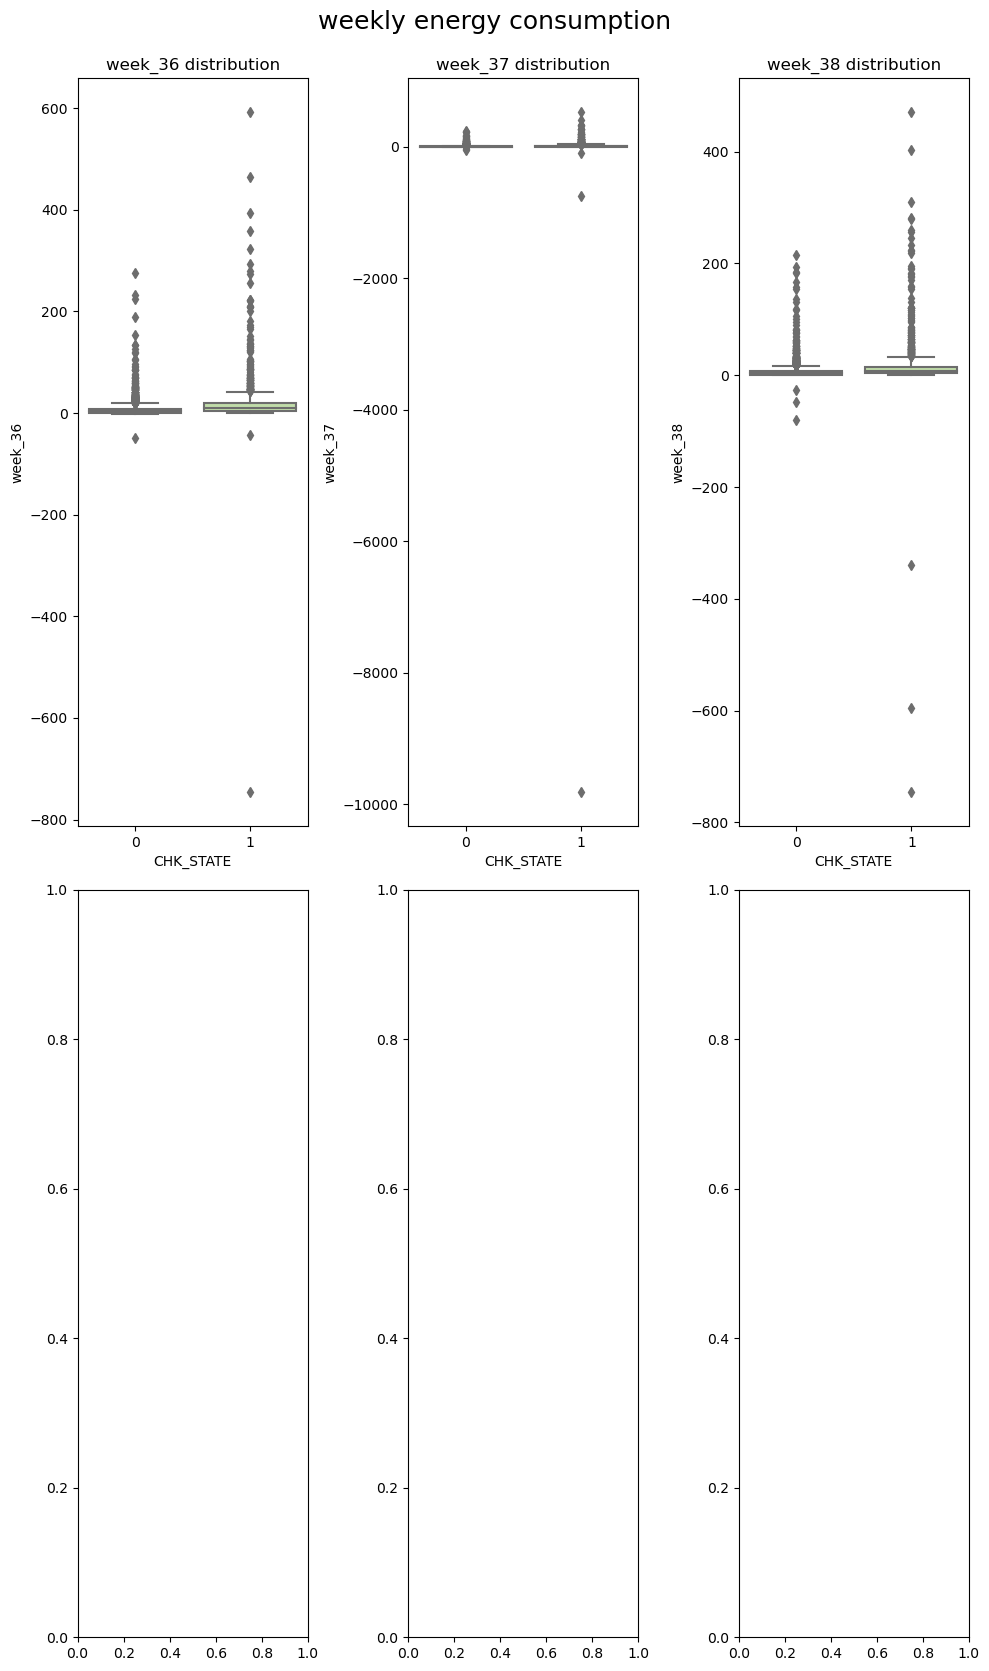

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(10, 17))
fig.suptitle('weekly energy consumption\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df_consumption, x='CHK_STATE', y='week_36', palette='Spectral')
axes[0,0].set_title("week_36 distribution");

sns.boxplot(ax=axes[0, 1], data=df_consumption, x='CHK_STATE', y='week_37', palette='Spectral')
axes[0,1].set_title("week_37 distribution");

sns.boxplot(ax=axes[0, 2], data=df_consumption, x='CHK_STATE', y='week_38', palette='Spectral')
axes[0,2].set_title("week_38 distribution");


plt.tight_layout()

## Tukey's IQR method
Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.
Any data points beyond the upper or lower limits can be considered outliers.


In [64]:
#df_consumption[col_list].head()
upper_bound_list = []
lower_bound_list  = []
for col in col_list:
    Q1 = np.percentile(df_consumption[col], 75)
    Q3 = np.percentile(df_consumption[col], 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (3 * IQR ) # extreme outliers
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (1.5 * IQR ) #outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound_list.append(upper_bound)
    lower_bound_list.append(lower_bound)



# Standard deviation method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

Standard deviation shows how much the individual data points are spread out from the mean. If a data distribution is normal then:

68% of the data values lie within one standard deviation of the mean
95% are within two standard deviations
99.7% lie within three standard deviations.
Depending on the set specification either at 2 times stdev or 3 times stdev, we can detect and remove outliers from the dataset.

This method can fail to detect outliers because the outliers increase the standard deviation. The more extreme the outlier, the more the standard deviation is affected.

In [71]:
for col in col_list:
    mean_weak = df_consumption[col].mean()
    std_div = df_consumption[col].std()
    cut_off = std_div * 3
    upper_bound =  mean_weak + cut_off
    lower_bound =  mean_weak - cut_off

In [74]:
df_consumption[df_consumption > lower_bound]

week,CONS_NO,CHK_STATE,week_1,week_10,week_11,week_12,week_13,week_14,week_15,week_16,...,week_49,week_5,week_50,week_51,week_52,week_53,week_6,week_7,week_8,week_9
0,147535,0,1.4825,1.555714,1.705714,1.871429,1.718571,1.927143,1.718571,1.940000,...,1.685714,1.507143,1.628571,1.681429,1.590000,1.5300,1.602857,1.548571,1.100000,1.554286
1,1020324,0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,1299400,0,12.2325,15.127143,12.334286,10.582857,9.315714,10.441429,7.992857,8.941429,...,11.312857,11.324286,10.822857,12.398571,13.068571,13.9275,14.572857,9.327143,13.348571,12.370000
3,1312070,0,9.6125,10.760000,9.665714,7.524286,7.270000,7.188571,7.415714,6.882857,...,6.257143,6.710000,7.348571,7.677143,7.602857,9.1475,8.460000,8.830000,8.492857,9.190000
4,2014383,0,4.6825,6.090000,5.517143,4.675714,5.404286,5.082857,4.681429,3.991429,...,4.880000,5.865714,5.202857,4.658571,5.088571,3.5975,5.530000,4.624286,7.221429,5.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9544,9991020324,0,7.2825,7.924286,8.030000,5.548571,5.610000,4.892857,6.481429,5.245714,...,8.038571,6.731429,7.230000,8.102857,6.761429,6.4550,8.595714,8.887143,7.061429,6.604286
9545,9994414033,0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.381429,0.000000,0.388571,0.318571,0.418571,0.3850,0.000000,0.000000,0.000000,0.000000
9546,9995100023,0,0.0000,1.170000,1.044286,1.004286,0.967143,0.975714,0.928571,1.545714,...,0.000000,0.000000,1.207143,1.258571,1.682857,1.2650,0.000000,0.547143,3.947143,1.084286
9547,9999569657,0,8.9400,10.461429,10.065714,8.035714,6.200000,7.874286,7.122857,6.565714,...,9.000000,8.940000,9.832857,7.511429,8.070000,6.6150,8.940000,8.777143,9.788571,8.917143


# Few Important points about using std deviation to detect outliers.
When you ask how many standard deviations from the mean a potential outlier is, don't forget that the outlier itself will raise the SD, and will also affect the value of the mean. If you have N values, the ratio of the distance from the mean divided by the SD can never exceed (N-1)/sqrt(N). This matters the most, of course, with tiny samples. For example, if N=3, no outlier can possibly be more than 1.155*SD from the mean, so it is impossible for any value to ever be more than 2 SDs from the mean. (This assumes, of course, that you are computing the sample SD from the data at hand, and don't have a theoretical reason to know the population SD).

The critical values for # were computed to take this into account, and so depend on sample size.

Hypothesis testing for outliers

# Tietjen-Moore Test for Outliers
# Grubbs' Test for Outliers
